In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon
from skimage.util import random_noise
import sys
sys.path.append('/Users/dzhansavarmail.ru/Desktop/artefakt/ct_simulation-main/src/CT_simulation')
import gen_and_deg
from gen_and_deg import *


In [25]:
image = generate(num_vertices=5)

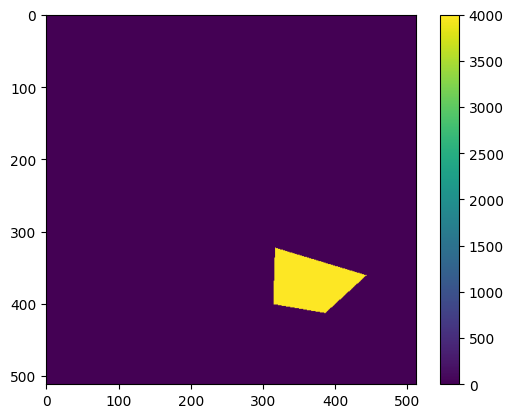

In [26]:
plt.imshow(image, cmap='viridis')
plt.colorbar()
plt.show()

In [27]:
n = 128
theta = np.linspace(0., 180., n, endpoint=False)
sigma = 1e-1
max_p = 1e5

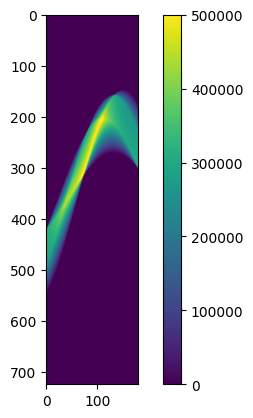

In [28]:
plt.imshow(np.clip(radon(image, circle=0), None, 500000), cmap='viridis')
plt.colorbar()
plt.show()

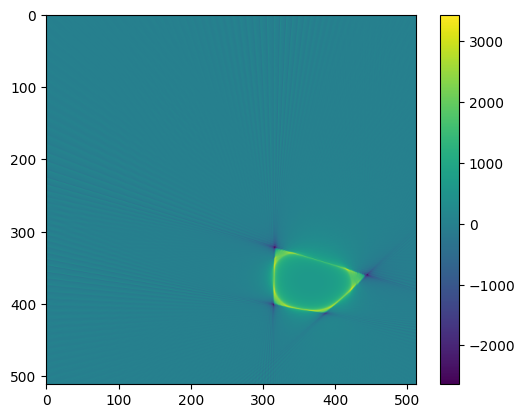

In [29]:
image_reconstructed = degradation(image, theta=theta, max_p=1e5)

plt.imshow(image_reconstructed, cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
num_samples = 100
features = np.array([generate2() for _ in range(num_samples)])

In [ ]:
targets = np.array([degradation(arr, theta) for arr in features])

np.save('targets.npy', targets)

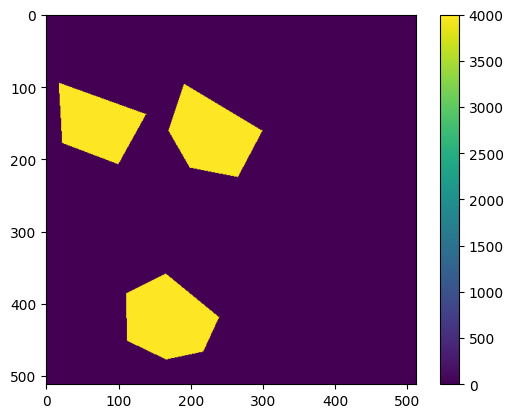

In [100]:
plt.imshow(features[1], cmap='viridis')
plt.colorbar()
plt.show()

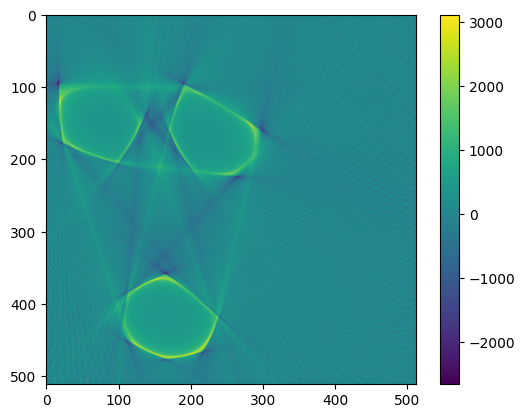

In [101]:
plt.imshow(targets[1])
plt.colorbar()
plt.show()

In [50]:
size = 512
mu = 4000   # внутри овала

center_x, center_y = size // 2, size // 2

a = 65  # полуось (по вертикали)
b = 65  # полуось (по горизонтали)

ellipse = np.zeros((size, size))

for i in range(size):
    for j in range(size):
        # (x - x0)^2 / a^2 + (y - y0)^2 / b^2 <= 1
        if ((i - center_x) ** 2 / a ** 2) + ((j - center_y) ** 2 / b ** 2) <= 1:
            ellipse[i, j] = mu

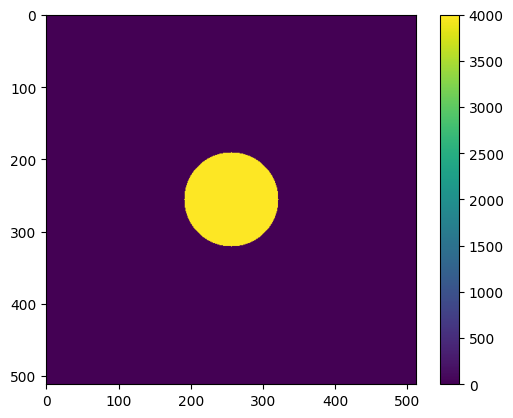

In [51]:
plt.imshow(ellipse)
plt.colorbar()
plt.show()

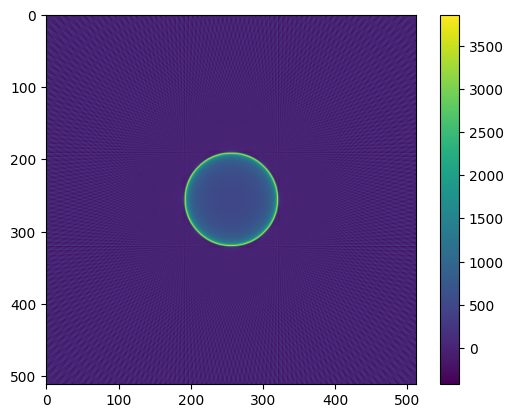

In [56]:
plt.imshow(degradation(ellipse, theta, max_p=1e5))
plt.colorbar()
plt.show()